In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [30]:
data = pd.read_csv("Titanic.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [31]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
survived       0
dtype: int64

In [32]:
data.Embarked.fillna(method = 'pad' , inplace = True)

In [33]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
survived       0
dtype: int64

In [34]:
data.drop(columns=["Passengerid"] , inplace = True)

In [35]:
data.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [36]:
data.Age.unique

<bound method Series.unique of 0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64>

In [37]:
data.Fare.unique

<bound method Series.unique of 0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64>

In [38]:
data.Sex.unique

<bound method Series.unique of 0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64>

In [39]:
data.sibsp.unique

<bound method Series.unique of 0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: sibsp, Length: 1309, dtype: int64>

In [40]:
data.Parch.unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, Length: 1309, dtype: int64>

In [41]:
data.Pclass.unique

<bound method Series.unique of 0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    1
1306    3
1307    3
1308    3
Name: Pclass, Length: 1309, dtype: int64>

In [42]:
data.Embarked.unique

<bound method Series.unique of 0       2.0
1       0.0
2       2.0
3       2.0
4       2.0
       ... 
1304    2.0
1305    0.0
1306    2.0
1307    2.0
1308    0.0
Name: Embarked, Length: 1309, dtype: float64>

In [43]:
data.survived.unique

<bound method Series.unique of 0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64>

In [44]:
data.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [45]:
print(data.Age.dtype , data.Fare.dtype , data.Sex.dtype , data.sibsp.dtype , 
data.Parch.dtype , data.Pclass.dtype , data.Embarked.dtype , data.survived.dtype)

float64 float64 int64 int64 int64 int64 float64 int64


In [46]:
Y = data.survived
X = data.iloc[:,0:7]

In [47]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , random_state= 10)

In [48]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(981, 7) (328, 7) (981,) (328,)


In [53]:
model = DecisionTreeClassifier(max_depth=2)

In [54]:
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2)

In [55]:
model.score(x_test , y_test)

0.8109756097560976

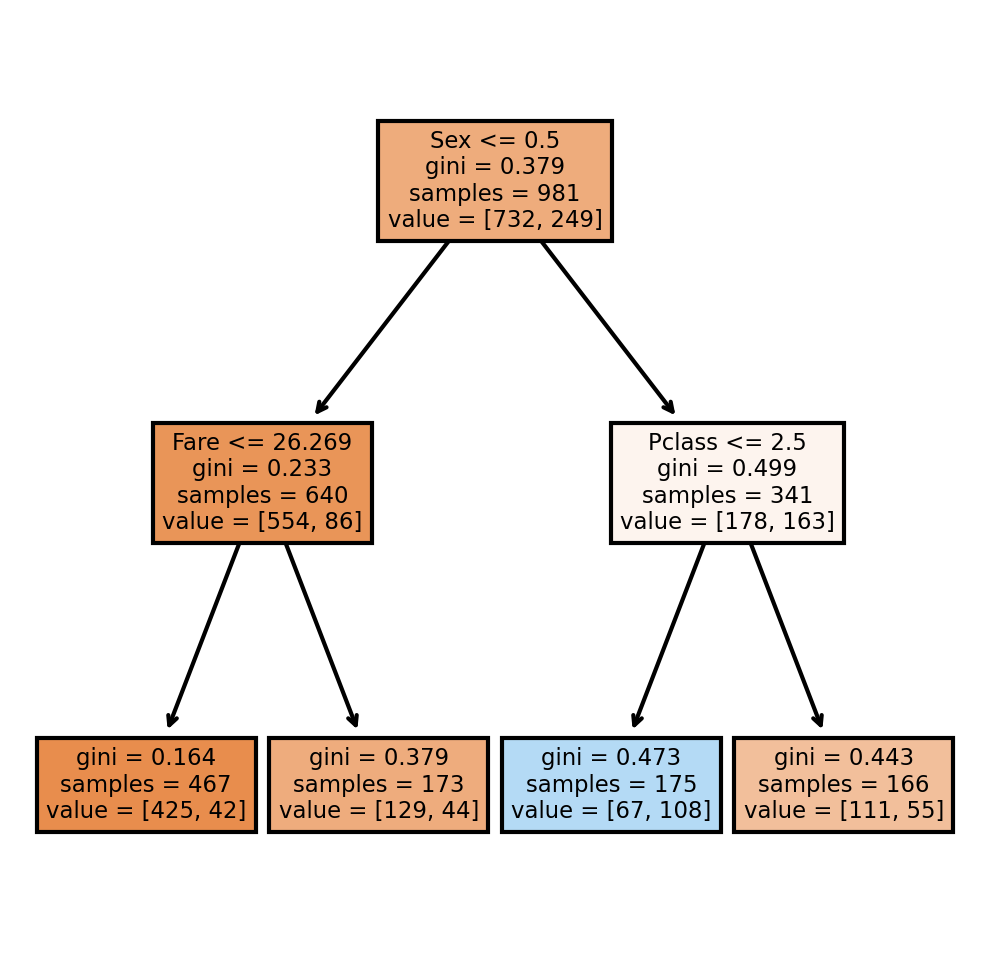

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model,
           feature_names = x_train.columns, 
           filled = True);
# Saving your plot if you want
fig.savefig('DT.jpg')